# Introduction:
- In this project, we will be exploring the Trip Advisor hotel reviews datset. Based on the customer reviews, we will be predicting the rating given by the customer.
- To begin with, we will explore the textual data, based on which we use NLP tools to perform feature engineering.
- Afterwards, we will employ data preprocessing techniques for textual data (stemming, lemmatization, and stop word removal) and get the final feature matrix.
- Finally, we train a deep learning model, here a BERT model, to predict customer ratings based on above features.


## To-do list:
- Data Preprocessing (NLTK)
- Feature Engineering (Vader)
- Data exploration
- Using BERT Model
- Training and Hyperparameter Tuning
- Model Performance
- Prediction
- Saving Model
- Final thoughts


# Import Libraries

In [1]:
# Installing libraries:
%%capture
!pip install wordcloud
!pip install transformers
!pip install sentencepiece
!pip install datasets
!pip install vaderSentiment

In [2]:
# Common libaries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objects as go
from wordcloud import WordCloud

# NLP
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import TweetTokenizer
nltk.download('punkt')
from sklearn.feature_extraction.text import CountVectorizer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Model building
from sklearn.model_selection import train_test_split
import datasets
from datasets import Dataset, DatasetDict
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import pad_sequences

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


# Loading the dataset:
The Tripadvisor Dataset is available publicly available on [Zenodo](https://zenodo.org/record/1219899#.YHwt1J_ivIU)

In [3]:
df = pd.read_csv("tripadvisor_hotel_reviews.csv")
df

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5
20487,great location price view hotel great quick pl...,4
20488,"ok just looks nice modern outside, desk staff ...",2
20489,hotel theft ruined vacation hotel opened sept ...,1


## Check missing values:

In [4]:
df.isna().sum()

Review    0
Rating    0
dtype: int64

**Hence, our dataset has 20k reviews crawled from TripAdvisor, with no missing/null values**

# Textual data exploration:

## Wordcloud of whole dataset:

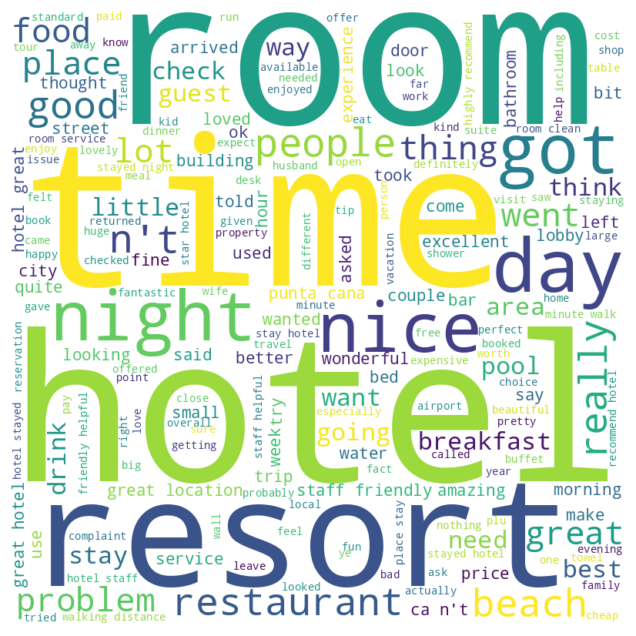

In [5]:
corpus = ''
for rev in df['Review']:
  corpus += rev + "\n\n"

wc = WordCloud(width = 800, height = 800, background_color = "white", min_font_size = 10, repeat=True)
wc.generate(corpus)
plt.figure(figsize = (8, 8), facecolor = None)
plt.axis("off")
plt.imshow(wc, interpolation = "bilinear")
plt.show()

- Words appearing frequently have bigger size in wordcloud. As a result, we see that words like: time, room, hotel and resort are appear very often.
- Meanwhile, terms like: price, happy, paid don't appear as much.

# Text Preprocessing using NLTK

In [6]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Stopword removal:
- Though "stopwords" usually refers to the most common words in a language, there is no single universal list of stop words used by all natural language processing tools, and indeed not all tools even use such a list.
- We would remove stopwords provided in the NLTK stopword list
- On the contrary, some tools specifically avoid removing these stop words to support phrase search. [Wikipedia](https://en.wikipedia.org/wiki/Stop_word)

In [7]:
df1 = df.copy()

def removing_stop_words(txt):
    stop_words = set(stopwords.words('english'))

    word_tokens = word_tokenize(txt)

    filtered_sentence = [w for w in word_tokens if not w in stop_words]

    return filtered_sentence

df1["Review"] = df1["Review"].apply(removing_stop_words)

In [8]:
df1

,Review,Rating
0,"[nice, hotel, expensive, parking, got, good, d...",4
1,"[ok, nothing, special, charge, diamond, member...",2
2,"[nice, rooms, 4, *, experience, hotel, monaco,...",3
3,"[unique, ,, great, stay, ,, wonderful, time, h...",5
4,"[great, stay, great, stay, ,, went, seahawk, g...",5
...,...,...
20486,"[best, kept, secret, 3rd, time, staying, charm...",5
20487,"[great, location, price, view, hotel, great, q...",4
20488,"[ok, looks, nice, modern, outside, ,, desk, st...",2
20489,"[hotel, theft, ruined, vacation, hotel, opened...",1


## Text Lemmatization:
- Lemmatization is the process of converting a word to its base form. This is slightly different from stemming.
- The difference between stemming and lemmatization is, lemmatization considers the context and converts the word to its meaningful base form, whereas stemming just removes the last few characters, often leading to incorrect meanings and spelling errors.
- **More about Lemmatization:** [Link](https://www.machinelearningplus.com/nlp/lemmatization-examples-python/)

In [9]:
lemmatizer = WordNetLemmatizer()

def lemmatize(data):

    lema_data=[]
    for j in data:
        x = j.lower()
        x = lemmatizer.lemmatize(j, pos = 'n')
        x = lemmatizer.lemmatize(j, pos = 'v')
        x = lemmatizer.lemmatize(j, pos = 'a')
        x = lemmatizer.lemmatize(j, pos = 'r')
        x = lemmatizer.lemmatize(x)
        lema_data.append(x)

    return lema_data


df1["Review"] = df1["Review"].apply(lemmatize)

In [10]:
df1

,Review,Rating
0,"[nice, hotel, expensive, parking, got, good, d...",4
1,"[ok, nothing, special, charge, diamond, member...",2
2,"[nice, room, 4, *, experience, hotel, monaco, ...",3
3,"[unique, ,, great, stay, ,, wonderful, time, h...",5
4,"[great, stay, great, stay, ,, went, seahawk, g...",5
...,...,...
20486,"[best, kept, secret, 3rd, time, staying, charm...",5
20487,"[great, location, price, view, hotel, great, q...",4
20488,"[ok, look, nice, modern, outside, ,, desk, sta...",2
20489,"[hotel, theft, ruined, vacation, hotel, opened...",1


## Text Concatenation:
Making all the comma seperated lemmatized words back into a string

In [11]:
df1["Review"] = df1["Review"].apply(lambda x: " ".join(token for token in x))

In [12]:
df1

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice room 4 * experience hotel monaco seattle ...,3
3,"unique , great stay , wonderful time hotel mon...",5
4,"great stay great stay , went seahawk game awes...",5
...,...,...
20486,"best kept secret 3rd time staying charm , 5-st...",5
20487,great location price view hotel great quick pl...,4
20488,"ok look nice modern outside , desk staff n't p...",2
20489,hotel theft ruined vacation hotel opened sept ...,1


**Note: The reviews were already in lowercase, so we need not do it again.**

# Feature Engineering:

## Sentiment scores using Vader:

- **[VADER](https://github.com/cjhutto/vaderSentiment#introduction)** (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media.
- We will be using Vader to get sentimental scores and then converting those scores into 3 categories: Positive, Negative, and Neutral


In [13]:
analyzer = SentimentIntensityAnalyzer()

def compound_score(txt):
    return analyzer.polarity_scores(txt)["compound"]

# Sentiment score mapping to categories
def sentiment(score):
    emotion = ""
    if score >= 0.5:
        emotion = "Positive"
    elif score <= -0.5:
        emotion = "Negative"
    else:
        emotion = "Neutral"
    return emotion

## Applying functions

In [14]:
df2 = df1.copy()

# Applying Compound score
polarity_scores = df2["Review"].astype("str").apply(compound_score)
df2["Sentiment_Score"] = polarity_scores

# Applying Sentiment
df2["Sentiment"] = df2["Sentiment_Score"].apply(sentiment)

In [15]:
df2

,Review,Rating,Sentiment_Score,Sentiment
0,nice hotel expensive parking got good deal sta...,4,0.9808,Positive
1,ok nothing special charge diamond member hilto...,2,0.9941,Positive
2,nice room 4 * experience hotel monaco seattle ...,3,0.9907,Positive
3,"unique , great stay , wonderful time hotel mon...",5,0.9926,Positive
4,"great stay great stay , went seahawk game awes...",5,0.9947,Positive
...,...,...,...,...
20486,"best kept secret 3rd time staying charm , 5-st...",5,0.9829,Positive
20487,great location price view hotel great quick pl...,4,0.9753,Positive
20488,"ok look nice modern outside , desk staff n't p...",2,0.5196,Positive
20489,hotel theft ruined vacation hotel opened sept ...,1,0.9955,Positive


# Visualization

## Univariate:

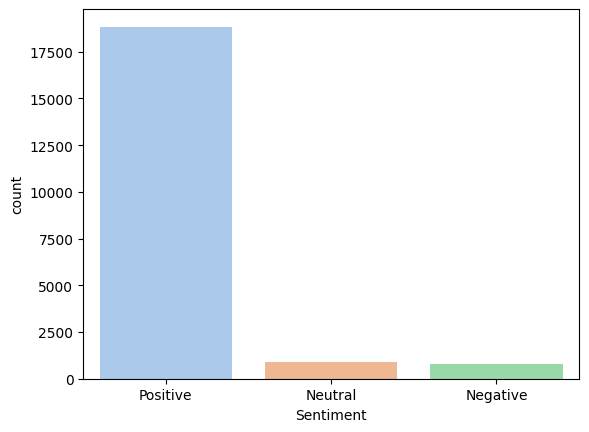

In [16]:
sns.countplot(data = df2, x = "Sentiment", palette = "pastel");

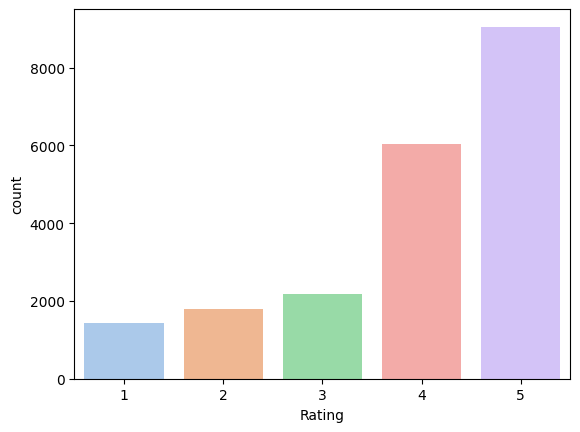

In [17]:
sns.countplot(data = df2, x = "Rating", palette = "pastel");

- Most of the comments are Positive
- Many people have given good ratings. This might imply the dominance of positive sentiments.

## Bivariate analysis for Rating and Sentiment Score:

### Jointplot:

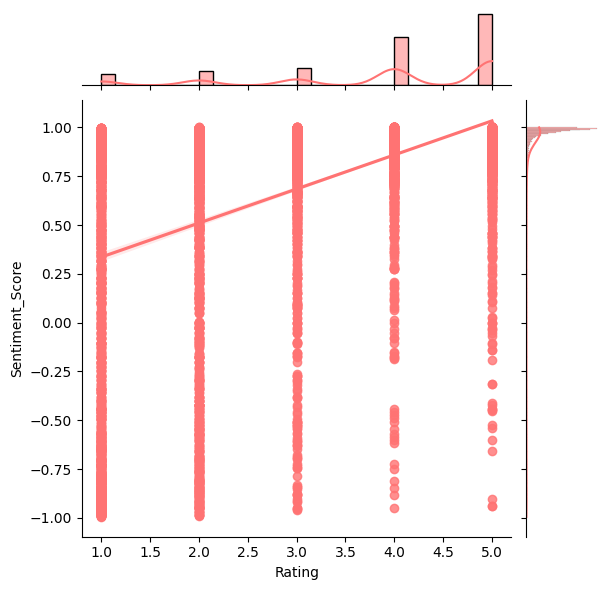

In [18]:
jp = sns.jointplot(data = df2, x = 'Rating', y = 'Sentiment_Score', kind="reg", color='#ff7373')

### Violin plot:

In [19]:
fig = go.Figure()

Ratings = [1,2,3,4,5]

for rating in Ratings:
    fig.add_trace(go.Violin(x = df2['Rating'][df2['Rating'] == rating],
                            y = df2['Sentiment_Score'][df2['Rating'] == rating],
                            name = rating,
                            box_visible = True,
                            meanline_visible = True))
fig.update_layout(
    title = "Violin plot of Rating and Sentiment Score",
    xaxis_title = "Rating",
    yaxis_title = "Sentiment Score",
    font = dict(
        family = "Courier New, monospace",
        size = 12,
    )
)
fig.show()

- Joint plot shows sentimental score is directly affected by ratings, but it's all over the place, you won't find certain pattern or clusters.
- Violin plot gives us a better picture of the relationship between Ratings and Sentiments.
- From 3 to 5 rating most of the review sentiments are positive.

## Bivariate analysis for Review and Sentiment Score:

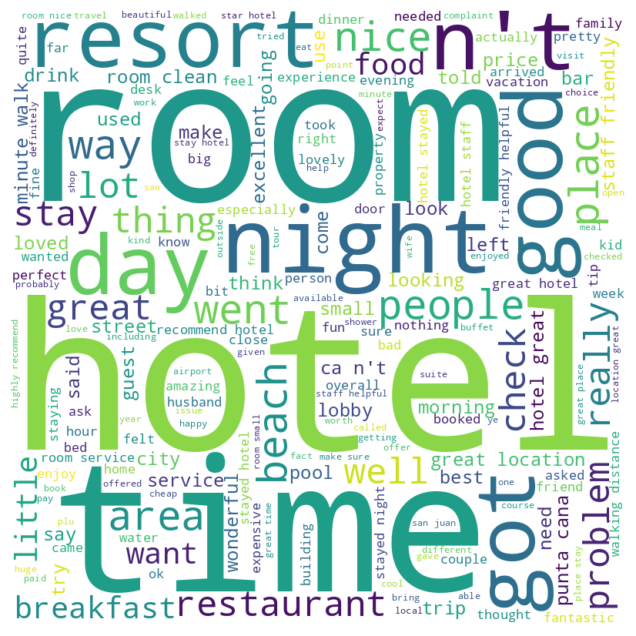

In [20]:
text1 = ''
for txt in df2[df2['Sentiment']=='Positive']['Review'].values:
    text1 += txt + '\n\n'

wc1 = WordCloud(width = 800, height = 800, background_color = "white", min_font_size = 10, repeat = True)
wc1.generate(text1)
plt.figure(figsize = (8, 8), facecolor = None)
plt.axis("off")
plt.imshow(wc1, interpolation = "bilinear")
plt.show()

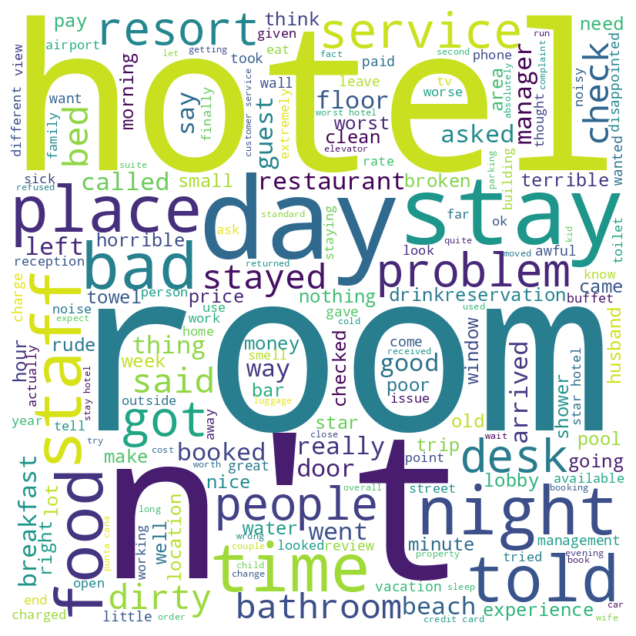

In [21]:
text2 = ''
for txt in df2[df2['Sentiment']=='Negative']['Review']:
    text2 += txt + '\n\n'

wc2 = WordCloud(width = 800, height = 800, background_color = "white", min_font_size = 10, repeat = True)
wc2.generate(text2)
plt.figure(figsize = (8, 8), facecolor = None)
plt.axis("off")
plt.imshow(wc2, interpolation = "bilinear")
plt.show()

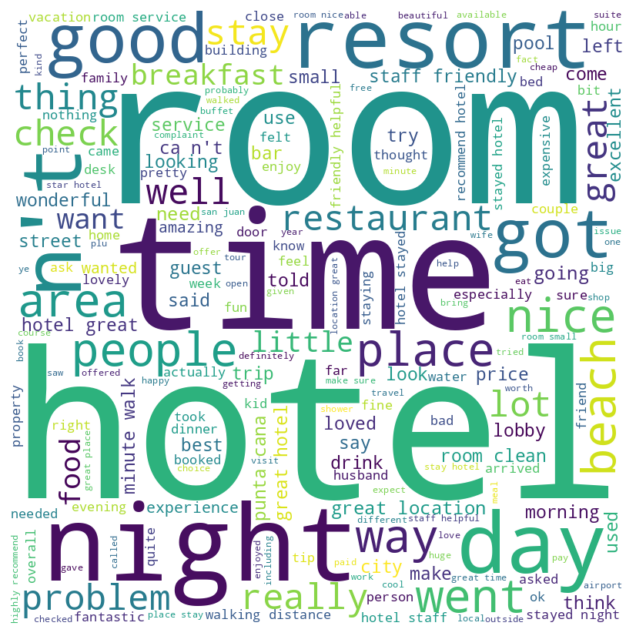

In [22]:
text3 = ''
for txt in df2[df2['Sentiment']=='Neutral']['Review']:
    text3 += txt + '\n\n'

wc3 = WordCloud(width = 800, height = 800, background_color = "white", min_font_size = 10, repeat = True)
wc3.generate(text1)
plt.figure(figsize = (8, 8), facecolor = None)
plt.axis("off")
plt.imshow(wc3, interpolation = "bilinear")
plt.show()

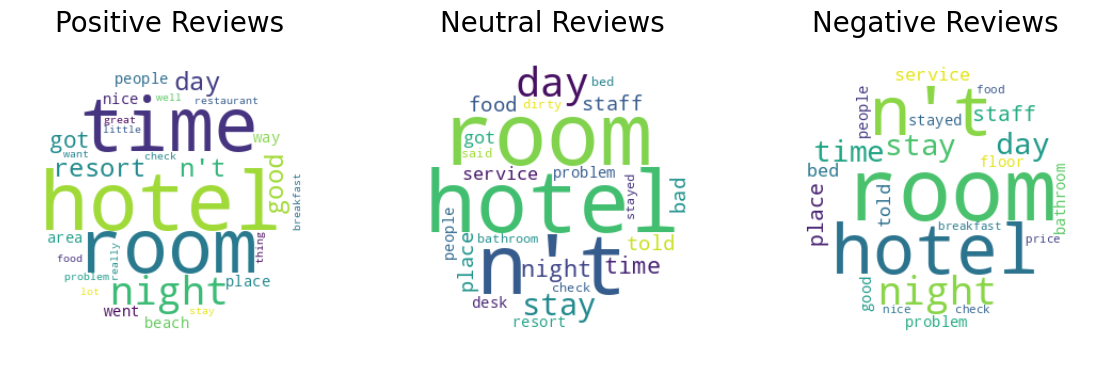

In [23]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=[14, 14], facecolor = None)

text1 = ''
for txt in df2[df2['Sentiment']=='Positive']['Review'].values:
    text1 += txt + ' '

x, y = np.ogrid[:300, :300]

mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

wc1 = WordCloud(width = 800, height = 800,background_color="white",min_font_size = 10,\
    repeat=True, mask=mask)
wc1.generate(text1)

ax1.axis("off")
ax1.imshow(wc1, interpolation="bilinear")
ax1.set_title('Positive Reviews',fontsize=20);

text2 =''
for txt in df2[df2['Sentiment']=='Negative']['Review'].values:
    text2 += txt + ' '

x, y = np.ogrid[:300, :300]

mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)


wc2 = WordCloud(width = 800, height = 800,background_color="white",min_font_size = 10,\
    repeat=True, mask=mask)
wc2.generate(text2)

ax2.axis("off")
ax2.imshow(wc2, interpolation="bilinear")
ax2.set_title('Neutral Reviews',fontsize=20);

text3 =''
for txt in df2[df2['Sentiment']=='Neutral']['Review'].values:
    text3 += txt + ' '

x, y = np.ogrid[:300, :300]

mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

wc3 = WordCloud(width = 800, height = 800,background_color="white",min_font_size = 10,\
    repeat=True, mask=mask)
wc3.generate(text3)

ax3.axis("off")
ax3.imshow(wc3, interpolation="bilinear")
ax3.set_title('Negative Reviews',fontsize=20);

plt.show()

The most common word used in all three Sentiments was a hotel room. Which is quite obvious.

## Bivariate analysis for Review and Rating:


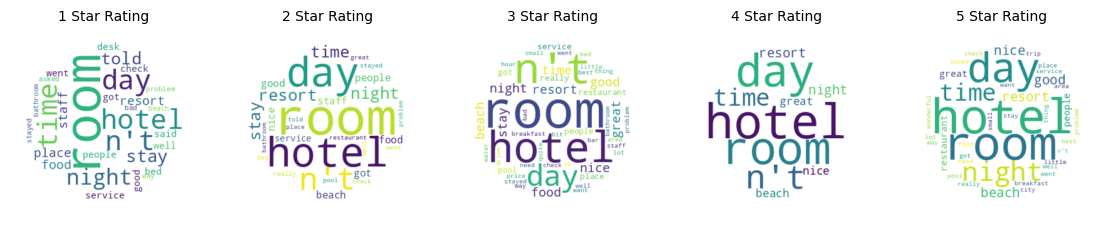

In [24]:
# Getting all the reviews termed positive in a single string and forming a word cloud of the string
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=[14, 14], facecolor = None)

## Text 1
text1 =''
for txt in df2[df2['Rating']==1]['Review'].values:
    text1 += txt + ' '

x, y = np.ogrid[:300, :300]

mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

wc1 = WordCloud(width = 400, height = 400,background_color="white",min_font_size = 10,\
    repeat=True, mask=mask)
wc1.generate(text1)

ax1.axis("off")
ax1.imshow(wc1, interpolation="bilinear")
ax1.set_title('1 Star Rating',fontsize=10);

## Text 2
text2 =''
for txt in df2[df2['Rating']==2]['Review'].values:
    text2 += txt + ' '

x, y = np.ogrid[:300, :300]

mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)


wc2 = WordCloud(width = 400, height = 400,background_color="white",min_font_size = 10,\
    repeat=True, mask=mask)
wc2.generate(text2)

ax2.axis("off")
ax2.imshow(wc2, interpolation="bilinear")
ax2.set_title('2 Star Rating',fontsize=10);

## Text 3
text3 =''
for txt in df2[df2['Rating']==3]['Review'].values:
    text3 += txt + ' '

x, y = np.ogrid[:300, :300]

mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

wc3 = WordCloud(width = 400, height = 400,background_color="white",min_font_size = 10,\
    repeat=True, mask=mask)
wc3.generate(text3)

ax3.axis("off")
ax3.imshow(wc3, interpolation="bilinear")
ax3.set_title('3 Star Rating',fontsize=10);

## Text 4
text4 =''
for txt in df2[df2['Rating']==4]['Review'].values:
    text4 += txt + ' '

x, y = np.ogrid[:300, :300]

mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

wc4 = WordCloud(width = 400, height = 400,background_color="white",min_font_size = 10,\
    repeat=True, mask=mask)
wc4.generate(text4)

ax4.axis("off")
ax4.imshow(wc4, interpolation="bilinear")
ax4.set_title('4 Star Rating',fontsize=10);

## Text 5
text5 =''
for txt in df2[df2['Rating']==5]['Review'].values:
    text5 += txt + ' '

x, y = np.ogrid[:300, :300]

mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

wc5 = WordCloud(width = 400, height = 400,background_color="white",min_font_size = 10,\
    repeat=True, mask=mask)
wc5.generate(text5)

ax5.axis("off")
ax5.imshow(wc5, interpolation="bilinear")
ax5.set_title('5 Star Rating',fontsize=10);

plt.show()

They all look almost similar so what ever the situation is people are mostly talking about **hotel rooms** and **day** from 1-5 star ratings.

## Most common words:

In [25]:
def get_top_n_words(corpus, n = 20):

    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [26]:
common_words = get_top_n_words(df2['Review'].values, 50)
common_words = np.array(common_words)
common_words = {"Words": common_words[:, 0], "Count": common_words[:, 1]}
common_words = pd.DataFrame(common_words)
common_words

,Words,Count
0,hotel,53834
1,room,47334
2,great,21476
3,good,17476
4,staff,16696
5,stay,15592
6,night,14465
7,day,13355
8,time,12893
9,nice,12643


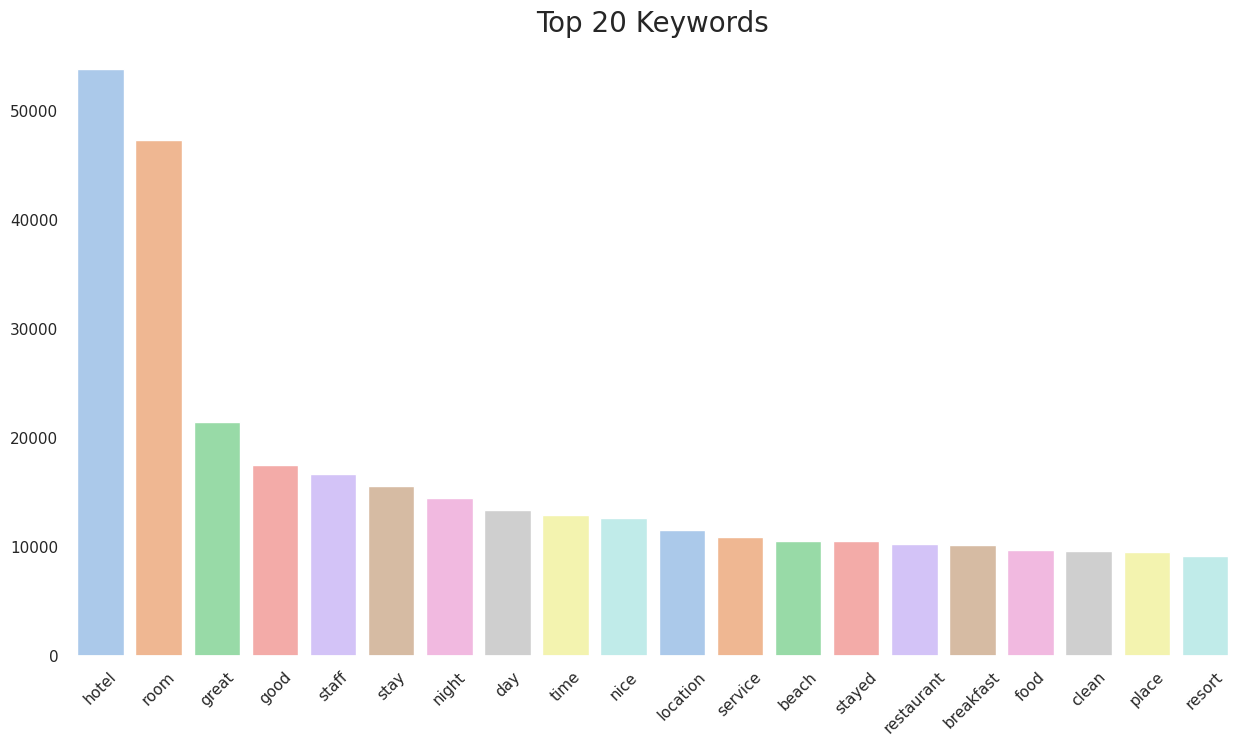

In [27]:
sns.set(rc = {'figure.figsize':(15, 8), 'axes.grid' : True})
ax = sns.barplot(x = common_words["Words"].values[:20], y = common_words["Count"].astype("float").values[:20], palette = "pastel")
ax.patch.set_visible(False)
ax.tick_params(axis = 'x', labelrotation = 45)
ax.set_title("Top 20 Keywords",fontsize = 20)
plt.grid()
plt.show()

apart from hotel rooms users are also talking about staff, location and breakfast.

# Combining textual and categorical features:

The simplest way to handle these non-text features is to convert them into text and concatenate them with the review text!

I figured that BERT would make better use of these additional features given some additional context... For example, to handle the "Sentiment" feature, instead of just prepending "Positive" on its own, prepending the text with "The overall sentiment of this review: Positive" is better.

In [28]:
combo_list = []
for idx, row in df2.iterrows():
  combo = ""
  combo += row["Review"] + "\n"
  combo += "overall sentiment of the review: " + row["Sentiment"]
  combo_list.append(combo)

combo_dict = {"Combined_feature": combo_list, "Rating": df2["Rating"].values}
df3 = pd.DataFrame(combo_dict)
df3

,Combined_feature,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice room 4 * experience hotel monaco seattle ...,3
3,"unique , great stay , wonderful time hotel mon...",5
4,"great stay great stay , went seahawk game awes...",5
...,...,...
20486,"best kept secret 3rd time staying charm , 5-st...",5
20487,great location price view hotel great quick pl...,4
20488,"ok look nice modern outside , desk staff n't p...",2
20489,hotel theft ruined vacation hotel opened sept ...,1


In [29]:
df3["Combined_feature"].values[0]

'nice hotel expensive parking got good deal stay hotel anniversary , arrived late evening took advice previous review valet parking , check quick easy , little disappointed non-existent view room room clean nice size , bed comfortable woke stiff neck high pillow , soundproof like heard music room night morning loud bang door opening closing hear people talking hallway , maybe noisy neighbor , aveda bath product nice , goldfish stay nice touch taken advantage staying longer , location great walking distance shopping , overall nice experience pay 40 parking night ,\noverall sentiment of the review: Positive'

# Training

## GPU settings:

In [30]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():

    # Tell PyTorch to use the GPU.
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla T4


## Tokenizer
The Tokenizer class of Keras is used for vectorizing a text corpus. For this either, each text input is converted into integer sequence or a vector that has a coefficient for each token in the form of binary values.

In [31]:
X = df3["Combined_feature"].values
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)

## Texts to Sequences
texts_to_sequences method helps in converting tokens of text corpus into a sequence of integers.

more can be learned from [machinelearningknowledge.ai](https://machinelearningknowledge.ai/keras-tokenizer-tutorial-with-examples-for-fit_on_texts-texts_to_sequences-texts_to_matrix-sequences_to_matrix/)

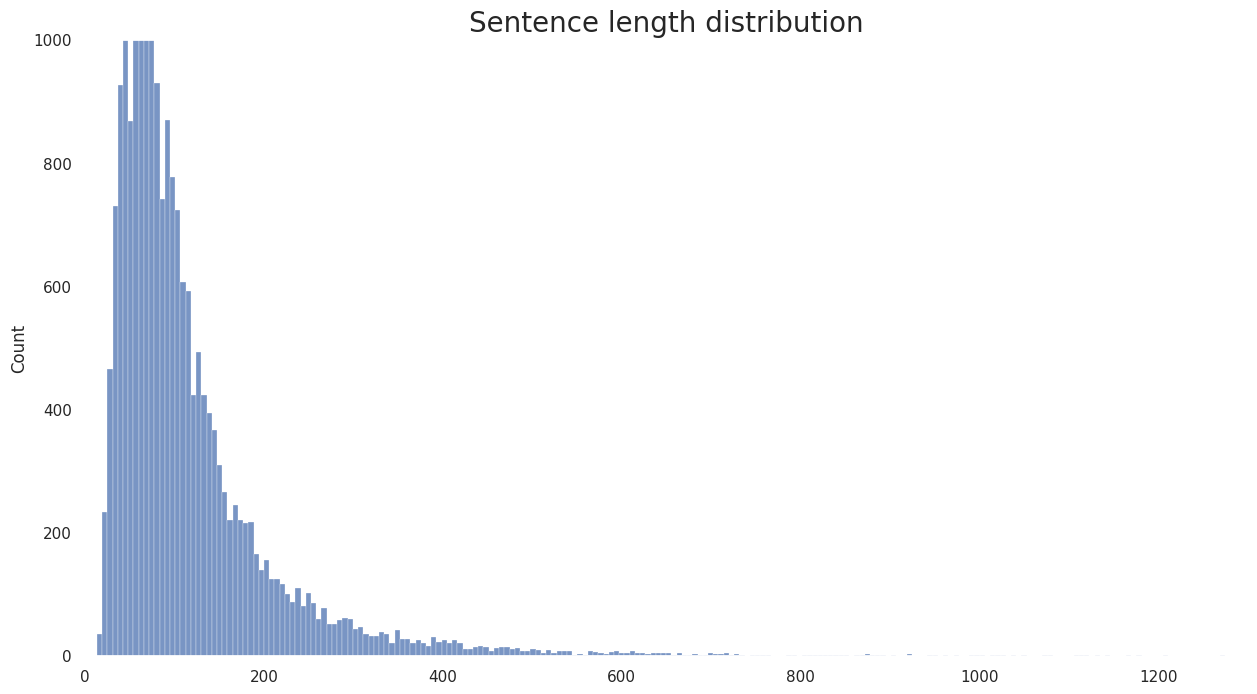

In [32]:
fig, ax = plt.subplots()
sns.set(rc={'figure.figsize':(12,9)})
length_dist = [len(x.split(" ")) for x in X]
sns.histplot(length_dist)
ax.patch.set_visible(False)
ax.set_xlim(0, 1300)
ax.set_ylim(0, 1000)
ax.set_title("Sentence length distribution",fontsize=20);
plt.show()

In [33]:
X = tokenizer.texts_to_sequences(X)

max_length = max([len(x) for x in X])
vocab_size = len(tokenizer.word_index)+1
above_512 = [1 for x in X if len(x)>512]
above_1024 = [1 for x in X if len(x)>1024]
print("Vocabulary size: {}".format(vocab_size))
print("Max length of sentence: {}".format(max_length))
print("NUmber of sentences with length>512: {}".format(len(above_512)))
print("NUmber of sentences with length>1024: {}".format(len(above_1024)))

Vocabulary size: 49204
Max length of sentence: 1974
NUmber of sentences with length>512: 201
NUmber of sentences with length>1024: 25


In [34]:
# Let's use a maximum length of 1024.
max_len = 512

## Remapping Ratings
remaping of ratings will help us reduce model output size from 6 to 5, which will improve the results.

In [35]:
labels = ['1', '2', '3', '4', '5']

y = df3['Rating']
y = y.map({1: 0,
            2: 1,
            3: 2,
            4: 3,
            5: 4
           })

## Train Test split
spliting our data into 90 percent Train and 10 percent test.

In [37]:
X_train, X_test, y_train, y_test = train_test_split(df3["Combined_feature"], y,
                                                    test_size=0.2, random_state=42, stratify = y)

train_df = pd.concat([X_train, y_train], axis=1)
train_df.rename(columns = {'Combined_feature':'text', 'Rating':'label'}, inplace = True)
test_df = pd.concat([X_test, y_test], axis=1)
test_df.rename(columns = {'Combined_feature':'text', 'Rating':'label'}, inplace = True)

In [38]:
train_df

,text,label
18017,excellent hotel great location stayed casa cam...,4
325,heavenly bed scam overall nice hotel excellent...,3
19390,excellent choice room mate alicia modern small...,4
5886,"probably new york finest 4 star hotel , return...",4
17248,stick sandal visited bahia principe punta cana...,1
...,...,...
5659,cristal palace central quiet travelling new ze...,3
10375,quaint cute getaway middle firenze great hotel...,3
11192,", okay sooo vacation couple , , boyfriend lati...",1
10159,good experience spending recent trip paris bus...,2


In [39]:
train_df = pd.concat([df3["Combined_feature"], y], axis=1)
train_df.rename(columns = {'Combined_feature':'text', 'Rating':'label'}, inplace = True)

In [40]:
train_ds = Dataset.from_pandas(train_df)
test_ds = Dataset.from_pandas(test_df)

ds = DatasetDict()

ds['train'] = train_ds
ds['test'] = test_ds

# print(ds)

## BERT model:

In [41]:
# Tokenizer:
from transformers import BertTokenizer

# Load the BERT tokenizer.
print('Loading BERT tokenizer...')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

def tokenize_function(example):
    return tokenizer(example["text"], truncation=True, padding=True, return_tensors="tf")

tokenized_ds = ds.map(tokenize_function, batched=True)

Loading BERT tokenizer...


Map:   0%|          | 0/20491 [00:00<?, ? examples/s]

Map:   0%|          | 0/4099 [00:00<?, ? examples/s]

In [42]:
# print("Tokenzing the text")
# train_encodings = tokenizer(list(X_train), truncation=True, padding=True, return_tensors="tf") # Doesn't accept np array, but a list dtype only
# test_encodings = tokenizer(list(X_test), truncation=True, padding=True, return_tensors="tf")

In [43]:
# Converting into tf dataset objects
from transformers import DataCollatorWithPadding

data_collator = DataCollatorWithPadding(tokenizer=tokenizer, return_tensors="tf")
train_dataset = tokenized_ds["train"].to_tf_dataset(
    columns=["input_ids", "token_type_ids", "attention_mask"],
    label_cols=["label"],
    batch_size=8,
    collate_fn=data_collator,
    shuffle=True
)

test_dataset = tokenized_ds["test"].to_tf_dataset(
    columns=["input_ids", "token_type_ids", "attention_mask"],
    label_cols=["label"],
    batch_size=8,
    collate_fn=data_collator,
    shuffle=True
)

/usr/local/lib/python3.10/dist-packages/datasets/arrow_dataset.py:385: FutureWarning:

The output of `to_tf_dataset` will change when a passing single element list for `labels` or `columns` in the next datasets version. To return a tuple structure rather than dict, pass a single string.
Old behaviour: columns=['a'], labels=['labels'] -> (tf.Tensor, tf.Tensor)  
             : columns='a', labels='labels' -> (tf.Tensor, tf.Tensor)  
New behaviour: columns=['a'],labels=['labels'] -> ({'a': tf.Tensor}, {'labels': tf.Tensor})  
             : columns='a', labels='labels' -> (tf.Tensor, tf.Tensor) 



In [44]:
# Loading model
from transformers import TFBertForSequenceClassification
from tensorflow.keras.optimizers.schedules import PolynomialDecay # For optimized training

batch_size = 8
num_epochs = 2

# The number of training steps is the number of samples in the dataset, divided by the batch size then multiplied
# by the total number of epochs. Note that the tf_train_dataset here is a batched tf.data.Dataset,
# not the original Hugging Face Dataset, so its len() is already num_samples // batch_size.
num_train_steps = len(X_train) * num_epochs
lr_scheduler = PolynomialDecay(
    initial_learning_rate=5e-5, end_learning_rate=0.0, decay_steps=num_train_steps
)
from tensorflow.keras.optimizers import Adam

opt = Adam(learning_rate=lr_scheduler)

In [45]:
model = TFBertForSequenceClassification.from_pretrained( # Load BertForSequenceClassification, the pretrained BERT model with a single linear classification layer on top.
      "bert-base-uncased", # Use the 12-layer BERT model, with an uncased vocab.
      num_labels = 5
 ) # The number of output labels--5 in our case.

loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer=opt, loss=loss, metrics=["accuracy"])

model.fit(train_dataset, epochs=2)

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/2
2562/2562 [==============================] - 2416s 922ms/step - loss: 0.8940 - accuracy: 0.6074
Epoch 2/2
2562/2562 [==============================] - 2344s 915ms/step - loss: 0.7120 - accuracy: 0.6919


# Metrics

## Prediction

In [46]:
preds = model.predict(test_dataset)["logits"]
class_preds = np.argmax(preds, axis=1)
print(preds.shape, class_preds.shape)

513/513 [==============================] - 171s 328ms/step
(4099, 5) (4099,)


In [112]:
y_true = np.array(ds["test"]["label"])[np.array(ds["test"]["label"])>=3][:20]
y_pred = class_preds[class_preds>=3][:20]

## Confusion Matrix Heatmap
My model have accuracty predicted rating 1, 4 and 5. Its due to imbalce data as our data have more 4-5 star ratings. This could be solved by using more balnced data or using more samples to train the models.

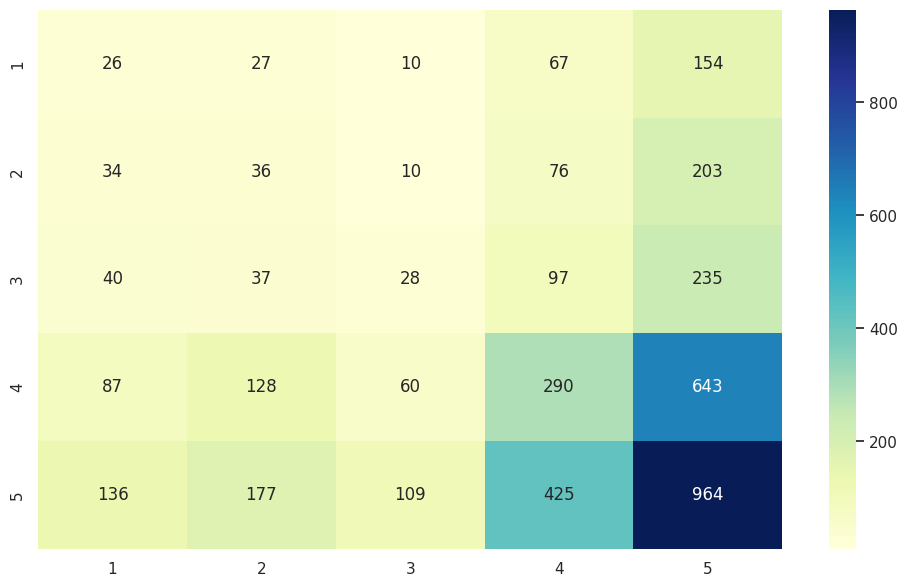

In [49]:
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(ds["test"]["label"], class_preds)

cm = pd.DataFrame(
    conf, index = [i for i in [1, 2, 3, 4, 5]],
    columns = [i for i in [1, 2, 3, 4, 5]]
)

plt.figure(figsize = (12,7))
sns.heatmap(cm, annot=True, fmt="d",cmap="YlGnBu")
plt.show()

## Classification Report
5th Rated class was accurately predicted on all three metrics and 4th class was the second-best predicted class. You can dive into the world of classification reports and find your conclusion.

In [113]:
from sklearn.metrics import f1_score
print(f1_score(y_true, y_pred, average="weighted"))

0.7359307359307359


## Conclusion

### Tripadvisor Prediction model
- Overall the BERT model performed well with limited resources and memory restrain.
- Using bigger models can increase accuracy.
- Gradient booster and logistic models do not perform well in text classification.

### Final Thoughts
Sentiments of reviews were all over the place and they did not have any effect on ratings. In reviews sometimes people are being sarcastic which is hard to pick by machine without context. Overall by analyzing keywords I have realized people were mostly writing reviews about the Hotel room, service, staff, and breakfast. Which is a good indicator for a hotel management team so they can focus on it, to get better reviews and 5 stars ratings.